## News Data Classification

### The Reuters dataset

### Loading the Reuters dataset

In [45]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [46]:
print(len(train_data))
print(len(test_data))


8982
2246


## Print the train data

In [47]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## Decoding the newswires back to text

In [48]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [49]:
train_labels[10]

3

## Preparing the data

## Encoding the input data

In [50]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [51]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [52]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Building the model

## Model definition

In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")
])

## Compile the model

In [54]:
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Validation

## Make a validation set

In [55]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [56]:
print(f"partial_x_train shape: {partial_x_train.shape}")
print(f"partial_y_train shape: {partial_y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

partial_x_train shape: (7982, 10000)
partial_y_train shape: (7982, 46)
x_val shape: (1000, 10000)
y_val shape: (1000, 46)


## Training the model

In [57]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.3530 - loss: 3.5533 - val_accuracy: 0.5630 - val_loss: 2.4763
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6024 - loss: 2.1444 - val_accuracy: 0.6450 - val_loss: 1.6191
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7110 - loss: 1.4077 - val_accuracy: 0.7250 - val_loss: 1.2884
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7705 - loss: 1.0660 - val_accuracy: 0.7570 - val_loss: 1.1393
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.8289 - loss: 0.8147 - val_accuracy: 0.7750 - val_loss: 1.0622
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8530 - loss: 0.6741 - val_accuracy: 0.7920 - val_loss: 0.9897
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8923 - loss: 0.5159 - val_accuracy: 0.8030 - val_loss: 0.9435
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9095 - loss: 0.4191 - val_accuracy: 0.8140 - 

## Plot the training and validation loss

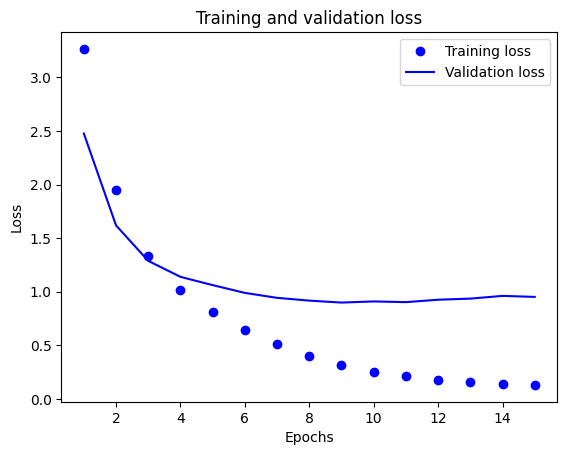

In [58]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Plot the training and validation accuracy

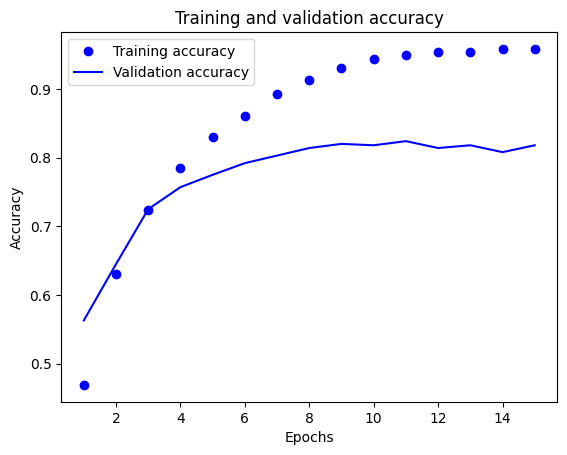

In [59]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Model evaluation

In [60]:
model.evaluate(x_val, y_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.9359


[0.9522930979728699, 0.8180000185966492]

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

(x_train, y_train), (x_test, y_test) = reuters.load_data()
unique_classes = sorted(set(y_train))
class_names = [f"Class #{i}" for i in unique_classes]
y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred, target_names=class_names, labels=unique_classes, zero_division=0))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

    Class #0       1.00      0.33      0.50         6
    Class #1       0.66      0.85      0.74        46
    Class #2       0.56      0.62      0.59         8
    Class #3       0.90      0.93      0.92       354
    Class #4       0.84      0.88      0.86       222
    Class #5       0.00      0.00      0.00         0
    Class #6       1.00      0.33      0.50         3
    Class #7       0.00      0.00      0.00         1
    Class #8       0.56      0.53      0.55        17
    Class #9       0.86      0.86      0.86        14
   Class #10       0.76      0.76      0.76        17
   Class #11       0.86      0.82      0.84        44
   Class #12       1.00      0.30      0.46        10
   Class #13       0.88      0.70      0.78        20
   Class #14       0.33      0.33      0.33         3
   Class #15       0.00      0.00      0.00         2
   Class #16       0.74      0.83      0.7